# Artefactos en *Github Actions*.

Un artefacto es un archivo, en formato binarios por lo general, que es el resultado del proceso de compilación o empaquetado durante el ciclo de desarrollo de software.

Al ser una herramineta de *CI/CD*, es de esperarse que en la mayoría de los casos, el resultado de un *worlflow* de *Github Actions* sea un artefacto.

Debido a que los *runners* son máquinas efímeras, es necesario extraer y conservar de algún modo los artefactos resultantes de un *workflow*. Github actions permite extraer, consumir y guardar artefactos hasta por 90 días.

https://docs.github.com/en/actions/using-workflows/storing-workflow-data-as-artifacts

## Las *actions* de gestión de artefactos.

Las *actions* que permiten realizar operaciones con artefactos son:

* [```actions/upload-artifact```](https://github.com/actions/upload-artifact), la cual permite cargar un archivo o un directorio completo al *runner*.
* [```actions/download-artifact```](https://github.com/actions/download-artifact), la cual permite extraer un archivo o un documento y hacerlos disponible para su descarga.
* De forma interna, [```@actions/artifact```](https://github.com/actions/toolkit/tree/main/packages/artifact) permite gestionar los artefactos.

**Ejemplo:**

El repositorio https://github.com/PythonistaMX/api-github-actions-demo contiene el ,código de una *API REST* escrita en *Python* y *Flask* y adem;as contiene un workflow llamado [```empaqueta.yml```](https://github.com/PythonistaMX/api-github-actions-demo/blob/main/.github/workflows/empaqueta.yaml).

``` yaml
name: Empaqueta con tox

on:
  workflow_dispatch:

permissions:
  contents: read

jobs:
  build:

    runs-on: ubuntu-latest

    steps:
    - uses: actions/checkout@v3
    - name: Set up Python 3.10
      uses: actions/setup-python@v3
      with:
        python-version: "3.10"
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install flake8 pytest
        if [ -f requirements.txt ]; then pip install -r requirements.txt; fi
    - name: Package with tox
      run: |
        tox
    - name: Move package
      run: |
        mkdir $GITHUB_WORKSPACE/paquete
        cp $GITHUB_WORKSPACE/.tox/.pkg/dist/*.tar.gz $GITHUB_WORKSPACE/paquete/
        ls $GITHUB_WORKSPACE/paquete/
    - name: Use the Upload Artifact GitHub Action
      uses: actions/upload-artifact@v3
      with: 
        name: assets-for-download
        path: paquete
```

* El paso  ```Package with tox``` del *job* ```build``` crea un paquete ```.tar.gz``` con la aplicación resultante.
* El paso  ```Move package``` del *job* ```build``` copia el paquete ```.tar.gz``` al directorio ```paquete```.
* El paso  ```Use the Upload Artifact GitHub Action``` del *job* ```build``` extrae el paquete y lo almacena en ```assets-for-download```.

Al finalizar la ejecutación del *worklflow*, ```Empaqueta con tox```, es posible accedes y descargar el contenido de ```assets-for-download``` en el apartado ```Artifacts``` localizado en le resumen de la ejecución.
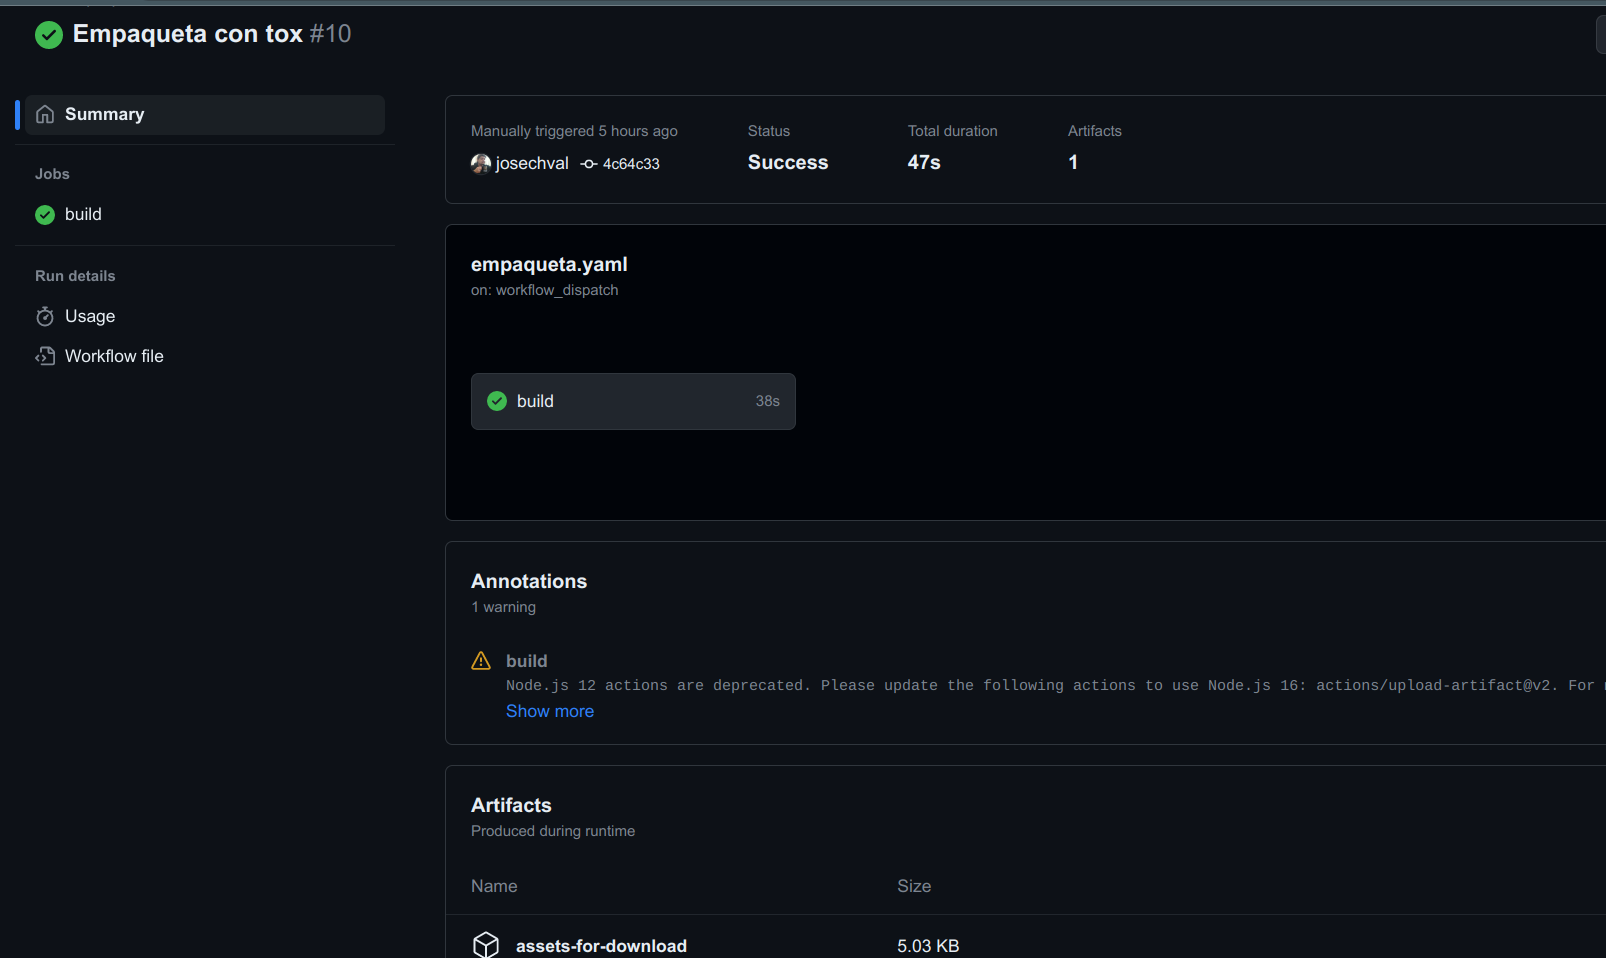

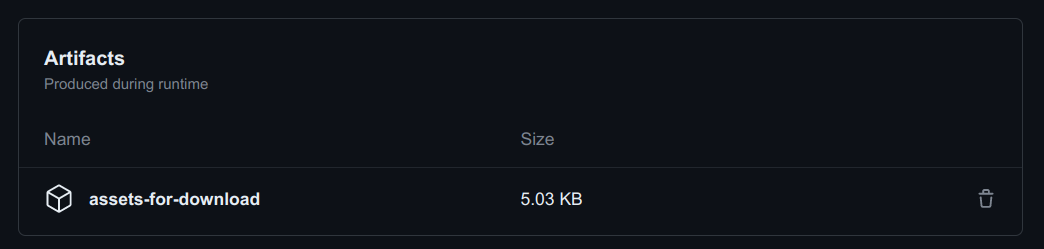

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2023.</p>